<h2 style="color:blue" align="center"> WTF23 DATA SCIENCE AND ARTIFICAIL INTELLIGENCE </h2>
<h2 style="color:blue" align="center"> GROUP C SUBGROUP 1 </h2>
<h2 style="color:blue" align="center"> CLASSWORK ON SUPORT VECTOR MACHINE USING LOAD DATA SET</h2>

<h3>Exercise</h3>

<p>
1. Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits)

2. Measure accuracy of your model using different kernels such as rbf and linear.

3. Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score. Use 80% of samples as training data size. </p>

<h4> Import Necessary libraries like Numpy, Pandas, Matplotlib, Seaborn, Scikit Learn etc.</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn

<h4> Load the dataset</h4>

In [2]:
from sklearn.datasets import load_digits

digit = load_digits()

In [3]:
digit_df = pd.DataFrame(digit.data)
digit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [4]:
digit.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

<h4> Viewing samples of digits as contained in the data set </h4>

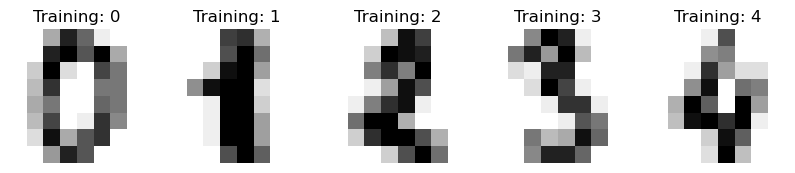

In [6]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digit.images, digit.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

<h4> We will classify data for features and target. To do this features will be convert into 2D array and Target is already given. We will as well divide the data into training and testing data set. Obtain the shape of each shape and finally Import Support Vector Classificstion model from Support Vector Machine. </h4>

In [7]:
n_samples = len(digit.images)
n_samples
x = digit.images.reshape((n_samples, -1))
print(x)
y= digit.target
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [8]:
## divinding data inot taining and testing
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 4)
print("Shape of Xtrain data:", xtrain.shape)
print("Shape of Ytrain data:", ytrain.shape)
print("Shape of Xtest data:", xtest.shape)
print("Shape of Xtest data:", ytest.shape)

Shape of Xtrain data: (1437, 64)
Shape of Ytrain data: (1437,)
Shape of Xtest data: (360, 64)
Shape of Xtest data: (360,)


<h4> Import Support Vector Classificstion model from Support Vector Machine </h4>

In [9]:
from sklearn.svm import SVC

model = SVC()
print("The model:\n", model)

The model:
 SVC()


<h4>Train the model and make predictions. Compute Confusion Matrix and Accuracy for <b>rbf</b>  and <b>linear</b> kernel</h4>

In [10]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Prediction given by model\n", ypred)

Prediction given by model
 [6 7 0 5 3 5 1 3 1 8 2 7 8 4 7 7 8 3 0 6 9 7 1 0 8 6 8 1 0 0 0 2 7 1 1 7 6
 3 1 3 4 2 9 5 2 0 0 7 3 3 2 9 7 6 1 8 5 8 6 7 5 6 9 3 1 4 1 9 7 8 4 4 2 4
 1 6 6 7 8 1 2 6 9 1 7 4 2 6 7 3 7 5 4 8 5 1 5 6 7 1 2 5 5 2 0 8 5 2 2 3 0
 4 5 6 9 3 9 5 7 4 7 8 9 4 9 7 9 7 9 4 3 0 5 4 9 2 3 2 9 6 2 6 0 5 5 8 9 2
 4 3 4 4 2 0 9 8 4 3 6 6 2 9 7 1 5 7 6 0 5 3 2 3 1 3 2 6 6 0 8 2 5 7 6 8 4
 6 2 2 0 4 0 3 0 4 0 1 5 6 4 7 1 5 4 5 5 3 4 4 6 3 7 1 1 3 5 7 5 0 1 9 5 0
 8 7 4 0 6 6 5 0 2 4 2 9 4 0 6 2 9 1 9 6 3 9 0 8 3 1 2 1 3 2 0 9 0 7 5 9 1
 8 6 9 6 8 8 6 2 4 5 9 9 1 5 2 8 4 7 9 8 8 0 1 7 3 2 2 1 0 3 2 3 9 7 2 0 0
 1 2 6 0 9 9 7 8 5 4 0 0 1 5 7 1 0 3 9 8 5 4 7 0 4 9 5 6 0 8 2 0 5 2 3 2 2
 4 2 8 7 5 8 8 6 9 2 6 4 5 9 5 4 1 7 1 7 3 4 8 5 4 3 7]


In [11]:
#Confusion Matrix and Accuracy for **rbf** kernel
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ytest, ypred)
print("Confusion Matrix is:\n", matrix)

Confusion Matrix is:
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  0]
 [ 0  0  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 38  0  0]
 [ 0  2  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0 35]]


In [12]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ytest, ypred)
print("Accuracy of model: {}%".format(accuracy*100))

Accuracy of model: 99.16666666666667%


In [13]:
##Accuracy with **linear** kernel
model_linear_kernel = SVC(kernel = "linear")
model_linear_kernel.fit(xtrain, ytrain)
print("Accuracy of model for linear kernel: {}%".format(model_linear_kernel.score(xtest, ytest)*100))

Accuracy of model for linear kernel: 98.05555555555556%


<h4> CONCLUSION </h4>

<p> From our output, we discovered that the RBF model gave a better model accuracy as compared the the Linear kernel.</p>